url = 'https://raw.githubusercontent.com/rodmsmendes/reinforcementlearning4fun/master/data/house_prices.csv'
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)

In [32]:
df = pd.read_csv("multivariate_LR.csv")

df.head()


,PropertySize,LivingArea,YearBuilt,Bedrooms,Price
0,8450,1710,2003,3,208500
1,9600,1262,1976,3,181500
2,11250,1786,2001,3,223500
3,9550,1717,1915,3,140000
4,14260,2198,2000,4,250000


In [3]:
# df.drop(['Unnamed: 0'], axis=1, inplace = True)

#  Preparing the data



The original dataset has 81 columns. Since I'm trying to use this dataset to show a simple example of machine learning in action I only need a few attributes to predict the SalePrice. 
So I select the following features and create a new dataframe out of it.

LotArea -  Lot size in square feet 

GrLivArea - Above grade (ground) living area square feet

YearBuilt - Original construction date

BedroomAbvGr - Number of bedrooms above basement level

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.




## Explore the dataset in Excel


# Linear Regression Machine Learning Model with Multi Variable 

In [4]:
from sklearn.linear_model import LinearRegression


In [33]:
multivariate = df.drop('Price',axis='columns')
Price = df["Price"] 

print(multivariate.shape)
print(Price.shape)



(1454, 4)
(1454,)


In [6]:
Price

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: Price, Length: 1454, dtype: int64

In [7]:
type(Price)

pandas.core.series.Series

In [8]:
multivariate.columns

Index(['PropertySize', 'LivingArea', 'YearBuilt', 'Bedrooms'], dtype='object')

In [9]:
multivariate.head()

,PropertySize,LivingArea,YearBuilt,Bedrooms
0,8450,1710,2003,3
1,9600,1262,1976,3
2,11250,1786,2001,3
3,9550,1717,1915,3
4,14260,2198,2000,4


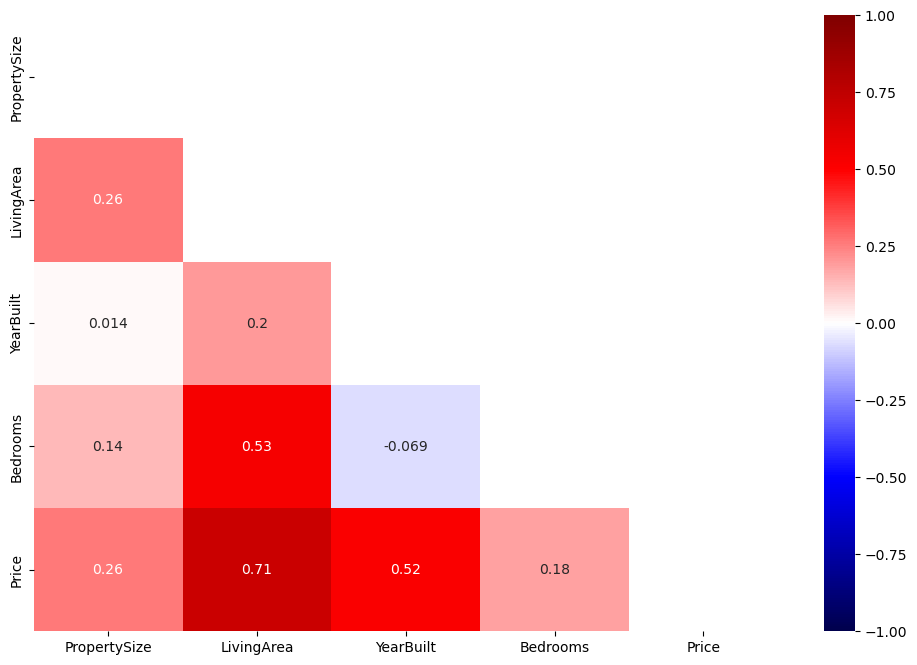

In [34]:
import seaborn as sns

plt.figure(figsize=(12,8))
corr= df.corr()
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, mask=matrix, vmin=-1, vmax=1, cmap='seismic')
plt.show()

In [35]:
# Reshape the dfs to have value for the column instead of a null.

Price = Price.values.reshape(-1, 1)

print(Price.shape)


(1454, 1)


In [12]:
type(Price)

numpy.ndarray

In [36]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split


### Predict price 'PropertySize', 'LivingArea', 'YearBuilt', 'Bedrooms'

In [41]:
multivariate_01_train, multivariate_01_test, Price_train, Price_test = train_test_split(multivariate, Price, test_size=0.2, random_state=42)

In [42]:
# Train the model 

reg_multi_01 = linear_model.LinearRegression()
reg_multi_01.fit(multivariate_01_train, Price_train)


LinearRegression()

In [43]:
# Predict values using test data.
reg_multi_score = (reg_multi_01.score(multivariate_01_test, Price_test) * 100).round(2)
print("The accuracy of the ML model is:", reg_multi_score , "%")


The accuracy of the ML model is: 73.03 %


['PropertySize', 'LivingArea', 'YearBuilt', 'Bedrooms']

In [68]:
# Enter the attributes ['PropertySize', 'LivingArea', 'YearBuilt', 'Bedrooms']
# of the house you want to predict the price for. 

predictions = [1491, 1233, 2001, 0]

pred_3 = reg_multi_01.predict([predictions]) 

print(f"A house with the following attributes:\nProperty Size: {predictions[0]}"
f"\nLiving Area: {predictions[1]}"
f"\nYear Built: {predictions[2]}"
f"\nBedrooms: {predictions[3]}"
f"\n\nWill cost around: {pred_3} Euros"
f"\n\nThis model is {reg_multi_score}% accurate" )

A house with the following attributes:
Property Size: 1491
Living Area: 1233
Year Built: 2001
Bedrooms: 3

Will cost around: [[172116.2481237]] Euros

This model is 73.03% accurate


/Users/elysium/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Now lets try the model again without 'PropertySize' & 'Bedrooms'

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1454 entries, 0 to 1459
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   PropertySize  1454 non-null   int64
 1   LivingArea    1454 non-null   int64
 2   YearBuilt     1454 non-null   int64
 3   Bedrooms      1454 non-null   int64
 4   Price         1454 non-null   int64
dtypes: int64(5)
memory usage: 68.2 KB


In [46]:
multivariate_02 = df.drop(['PropertySize', 'Bedrooms', 'Price'],axis='columns')
Price = df["Price"] 

Price = Price.values.reshape(-1, 1)

print(multivariate_02.shape)
print(Price.shape)



(1454, 2)
(1454, 1)


In [47]:
multivariate_02.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1454 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   LivingArea  1454 non-null   int64
 1   YearBuilt   1454 non-null   int64
dtypes: int64(2)
memory usage: 34.1 KB


In [48]:
multivariate_02_train, multivariate_02_test, Price_train, Price_test = train_test_split(multivariate_02, Price, test_size=0.2, random_state=0)

In [49]:
print(multivariate_02_train.shape)
print(multivariate_02_test.shape)
print(Price_train.shape)
print(Price_test.shape)

(1163, 2)
(291, 2)
(1163, 1)
(291, 1)


In [50]:
multivariate_02.columns

Index(['LivingArea', 'YearBuilt'], dtype='object')

In [51]:
# Train the model 

reg_multi_02 = linear_model.LinearRegression()
reg_multi_02.fit(multivariate_02_train, Price_train)


LinearRegression()

In [52]:
# Predict values using test data.
reg_multi_score_02 = (reg_multi_02.score(multivariate_02_test, Price_test) * 100).round(2)
print("The accuracy of the ML model based on Living Area is:", reg_multi_score_02 , "%")


The accuracy of the ML model based on Living Area is: 54.15 %


In [53]:
# Enter the attributes ['LivingArea', 'YearBuilt']
# of the house you want to predict the price for. 

predictions_02 = [1200, 1023]

pred_3 = reg_multi_02.predict([predictions_02]) 

print(f"A house with the following attributes: "
f"\nLiving Area: {predictions_02[0]}"
f"\nYear Built: {predictions_02[1]}"
f"\n\nWill cost around: {pred_3} Euros"
f"\n\nThis model is {reg_multi_score_02}% accurate" )


A house with the following attributes: 
Living Area: 1200
Year Built: 1023

Will cost around: [[-850355.10814894]] Euros

This model is 54.15% accurate


/Users/elysium/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [54]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin = LinearRegression()

lin.fit(multivariate_02, Price)


LinearRegression()

In [55]:

# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
  
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(multivariate_02)
  
poly.fit(X_poly, Price)
lin2 = LinearRegression()
lin2.fit(X_poly, Price)

LinearRegression()

In [56]:
print(multivariate_02.shape)
print(Price.shape)

(1454, 2)
(1454, 1)


# What about other ML Models

In [57]:
#Create a function within many Machine Learning Models
def models(X_train,Y_train):
  
  # Using Logistic Regression Algorithm to the Training Set
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(solver='lbfgs', max_iter=100)
  log.fit(X_train, Y_train.ravel())
  
  # Using Linear Regression Algorithm to the Training Set
  linreg = linear_model.LinearRegression()
  linreg.fit(X_train, Y_train)

  #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  # # Using SVC method of svm class to use Support Vector Machine Algorithm
  # from sklearn.svm import SVC
  # svc_lin = SVC(kernel = 'linear', random_state = 0)
  # svc_lin.fit(X_train, Y_train)

  # #Using SVC method of svm class to use Kernel SVM Algorithm
  # from sklearn.svm import SVC
  # svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  # svc_rbf.fit(X_train, Y_train)

  # #Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
  # from sklearn.naive_bayes import GaussianNB
  # gauss = GaussianNB()
  # gauss.fit(X_train, Y_train)

  #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train.ravel())

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train.ravel())
  
  #print model accuracy on the training data.
  print('Logistic Regression Training Accuracy:', (log.score(multivariate_02_test, Price_test))*100)
  print('Linear Regression Training Accuracy:', (linreg.score(multivariate_02_test, Price_test))*100)
  print('K Nearest Neighbor Training Accuracy:', knn.score(multivariate_02_test, Price_test))
  # print('Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(multivariate_02_test, Price_test))
  # print('Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(multivariate_02_test, Price_test))
  # print('Gaussian Naive Bayes Training Accuracy:', gauss.score(multivariate_02_test, Price_test))
  print('Decision Tree Classifier Training Accuracy:', (tree.score(multivariate_02_test, Price_test))*100)
  print('Random Forest Classifier Training Accuracy:', (forest.score(multivariate_02_test, Price_test))*100)
  
  # return log, tree, forest

In [58]:
models(multivariate_02_train, Price_train)


/Users/elysium/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/elysium/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Logistic Regression Training Accuracy: 0.6872852233676976
Linear Regression Training Accuracy: 54.15355944551929
K Nearest Neighbor Training Accuracy: 0.006872852233676976
Decision Tree Classifier Training Accuracy: 1.3745704467353952
Random Forest Classifier Training Accuracy: 1.0309278350515463
